In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = np.load("C:/Users/Andres Salguero/Desktop/Proyecto 1Preng/proyecto_training_data.npy", mmap_mode=None, allow_pickle=False, fix_imports=True, encoding ='ASCII')


In [3]:
df.shape

(1460, 6)

In [64]:
np.shape(df)

(1460, 6)

In [66]:
separar = int(df.shape[0]*0.8)
df[0:, 0]/= 1000 
df[0:, 2]/= 1000

In [67]:
dtrain = df[0: separar,:]
dtest  = df[separar : , :]

In [5]:
print(df)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [6]:
dataset = pd.DataFrame(df, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt', 'LotFrontage'])
dataset

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


NameError: name 'split_row' is not defined

In [7]:
dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


# Slicing Train/Test 80/20

In [8]:
ndataset = pd.DataFrame(dataset, columns =  ['SalePrice', 'OverallQual', '1stFlrSF'])
ndataset

,SalePrice,OverallQual,1stFlrSF
0,208500.0,7.0,856.0
1,181500.0,6.0,1262.0
2,223500.0,7.0,920.0
3,140000.0,7.0,961.0
4,250000.0,8.0,1145.0
...,...,...,...
1455,175000.0,6.0,953.0
1456,210000.0,6.0,2073.0
1457,266500.0,7.0,1188.0
1458,142125.0,5.0,1078.0


In [9]:
mask = np.random.rand(len(ndataset)) <= 0.8
df_train = df[mask]
df_test = df[~mask]

In [10]:
df_train =  pd.DataFrame(df_train, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt', 'LotFrontage'])

In [11]:
df_test =  pd.DataFrame(df_test, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt', 'LotFrontage'])

In [12]:
df_train.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,223500.0,7.0,920.0,6.0,2001.0,68.0
2,143000.0,5.0,796.0,5.0,1993.0,85.0
3,307000.0,8.0,1694.0,7.0,2004.0,75.0
4,200000.0,7.0,1107.0,7.0,1973.0,NaN


In [13]:
df_test.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,181500.0,6.0,1262.0,6.0,1976.0,80.0
1,140000.0,7.0,961.0,7.0,1915.0,60.0
2,250000.0,8.0,1145.0,9.0,2000.0,84.0
3,129500.0,5.0,1040.0,5.0,1965.0,70.0
4,279500.0,7.0,1494.0,7.0,2006.0,91.0


# Analisis exploratorio de datos

In [14]:
df_train.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,961.000000
mean,181218.243777,6.104721,1161.439485,6.515880,1971.987983,69.566077
std,77404.582712,1.380156,369.430988,1.601373,29.959076,22.239184
min,35311.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,130250.000000,5.000000,884.000000,5.000000,1954.000000,59.000000
50%,165000.000000,6.000000,1095.000000,6.000000,1974.000000,70.000000
75%,214900.000000,7.000000,1390.000000,7.000000,2001.000000,80.000000
max,745000.000000,10.000000,3138.000000,14.000000,2010.000000,182.000000


In [15]:
df_test.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,295.000000,295.000000,295.000000,295.000000,295.000000,240.000000
mean,179748.108475,6.077966,1167.315254,6.525424,1968.423729,71.987500
std,87157.144964,1.396310,448.647573,1.719792,31.035860,31.141126
min,34900.000000,3.000000,483.000000,3.000000,1880.000000,21.000000
25%,127500.000000,5.000000,864.000000,5.000000,1948.000000,59.000000
50%,155900.000000,6.000000,1057.000000,6.000000,1970.000000,68.000000
75%,202150.000000,7.000000,1399.500000,7.500000,1999.000000,80.000000
max,755000.000000,10.000000,4692.000000,12.000000,2009.000000,313.000000


In [16]:
ndataset.describe().round(4)

,SalePrice,OverallQual,1stFlrSF
count,1460.0000,1460.0000,1460.0000
mean,180921.1959,6.0993,1162.6267
std,79442.5029,1.3830,386.5877
min,34900.0000,1.0000,334.0000
25%,129975.0000,5.0000,882.0000
50%,163000.0000,6.0000,1087.0000
75%,214000.0000,7.0000,1391.2500
max,755000.0000,10.0000,4692.0000


# Graficar un histograma de la variable

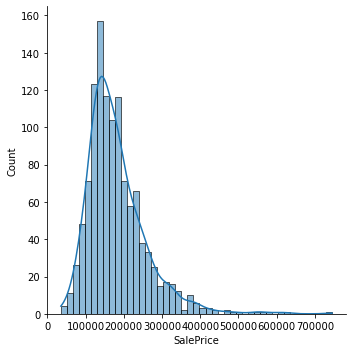

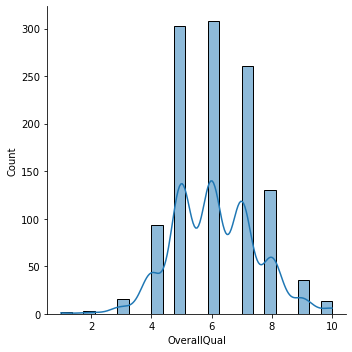

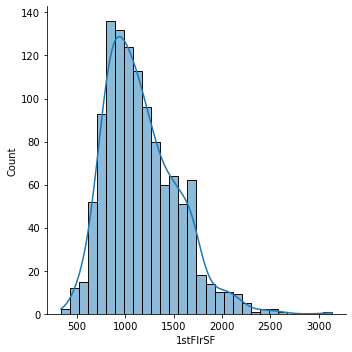

In [17]:
sns.displot(data=df_train, x="SalePrice", kde=True)
sns.displot(data=df_train, x="OverallQual", kde=True)
sns.displot(data=df_train, x="1stFlrSF", kde=True)


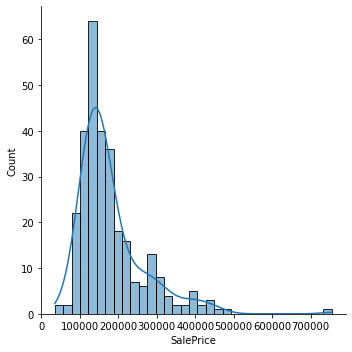

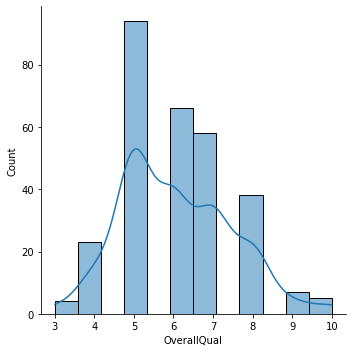

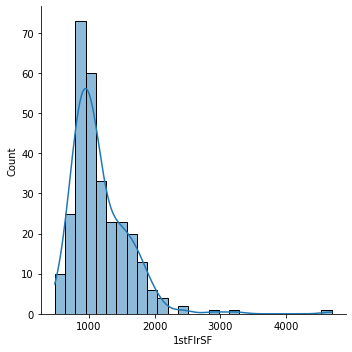

In [18]:
sns.displot(data=df_test, x="SalePrice", kde=True)
sns.displot(data=df_test, x="OverallQual", kde=True)
sns.displot(data=df_test, x="1stFlrSF", kde=True)

# 5. Para cada variable independiente x :

### Coef. de correlación de todas las variables: Seleccionamos las que tengan mayor correlación.

In [19]:
def colcCorrCoef(df, target):
    #X = df.copy()
    #X.drop([target], inplace = True)
    for col in df.columns:
        print('Correlación - ' + col + ":",
              df[target].corr(df[col], method = 'pearson'))

In [20]:
colcCorrCoef(dataset, 'SalePrice')

Correlación - SalePrice: 1.0
Correlación - OverallQual: 0.790981600583805
Correlación - 1stFlrSF: 0.6058521846919146
Correlación - TotRmsAbvGrd: 0.5337231555820275
Correlación - YearBuilt: 0.5228973328794974
Correlación - LotFrontage: 0.35179909657067826


### Graficar x vs y(scatterplot) usando matplotlib

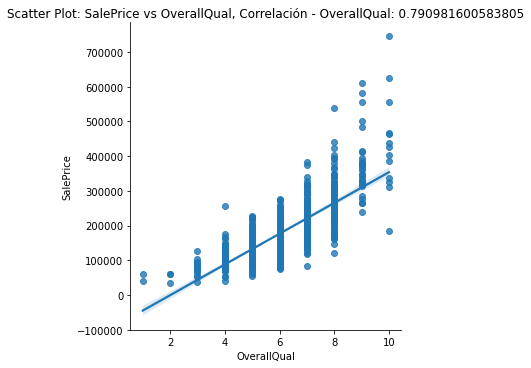

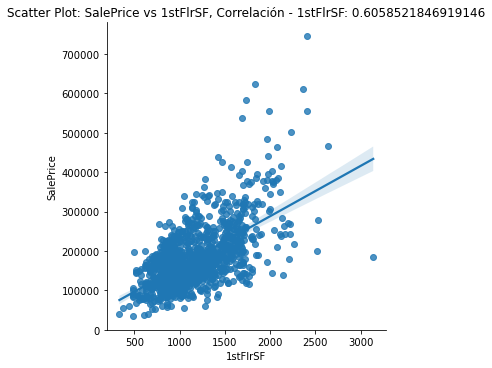

In [21]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df_train, lowess=False) 
plt.title("Scatter Plot: SalePrice vs OverallQual, Correlación - OverallQual: 0.790981600583805");

sns.lmplot(x='1stFlrSF', y='SalePrice', data=df_train, lowess=False) 
plt.title("Scatter Plot: SalePrice vs 1stFlrSF, Correlación - 1stFlrSF: 0.6058521846919146");

# Utilizar variable = OverallWual y 1stFlrSF para predecir SalePrice

In [ ]:
#parametros de la funcion

In [39]:
X = df_train['OverallQual']
Y = df_train['SalePrice']
epochs = 100
imprimir_error_cada = 20
learning_rate = 1


# cuerpo de la función

In [40]:
unos = np.ones(np.shape(X)).reshape(-1, 1)
X = X.to_numpy().reshape(-1, 1)
A = np.hstack([X, unos])
errores = []
b0 = 10
b1 = 20

for i in range(epochs):
    betas = np.array([b1,b0]).reshape(-1, 1)
    yEstimado = np.matmul(A, betas)
    gradienteB0 = np.mean(yEstimado - Y.to_numpy())
    gradienteB1 = np.mean((yEstimado - Y.to_numpy())*X)
    b0 = b0 - learning_rate*gradienteB0
    b1 = b1 - learning_rate*gradienteB1
    
    if((i % imprimir_error_cada) == 0):
        errores.append(np.mean((yEstimado - Y.to_numpy())**2)*1/2)
        

    
print("Beta0: ", b0)
print("Beta1: ", b1)


Beta0:  -7.542597658508943e+162
Beta1:  -4.83383150284903e+163


In [24]:
errores

[19389260391.256824,
 7.790688252949708e+73,
 3.881783968054018e+137,
 1.9341355070825868e+201,
 9.637012751209224e+264]

In [59]:
def modelo_entrenamiento(x,y,epoch,imprimir_error,learning_rate):
    error = np.zeros(epoch)
    ones = np.ones((x.shape[0],1))
    data = np.hstack((x,ones))
    modelo_dict = {}
    modelo = np.array([0.0,0.0]) 
    gradientes = np.array([0.0,0.0])
    print_counter = 1
    for i in range(0,epochs):
        yEstimado = (np.matmul(data,modelo)).reshape(-1,1)
        error[i] = 0.5 * (np.average((y-yEstimado)**2))
        gradientes = np.average((yEstimado-y)*data, axis=0)
        modelo -= (learning_rate*gradientes)
        modelo_dict[i] = model.copy()
        if (print_counter % print_interval) == 0:
            print("Error: "+str(error[i]))
        
        print_counter += 1
    return modelo_dict,error

def plot_error(error,titulo):
    plt.plot(range(0,error.shape[0]),error)
    plt.title(titulo+" - Errores")
    plt.show()
    
def plot_model(x,y,modelo, n):
    ones = np.ones((x.shape[0],1))
    data = np.hstack((x,ones))
    
    for i in range(n,len(modelo)+1,n):
        key = i-1
        yEstimado = (np.matmul(data,modelo[key])).reshape(-1,1)
        
        plt.plot()
        plt.scatter(x,y)
        plt.plot(x,yEstimado, color='g')
        plt.title("Iteración="+str(i)+", m="+str(round(modelo[key][0],2))+", b="+str(round(modelo[key][1],2)))
        plt.show()

In [70]:
x = dtrain[:,1].reshape(-1,1)
y = dtrain[:,0].reshape(-1,1)
colname=["SalePrice", "OverallQual", "1stFlrSF"]

Error: 1372.5833614180567
Error: 1352.189866223243
Error: 1333.6393271745892
Error: 1316.7651966879648
Error: 1301.4159780516316
Error: 1287.4538652818671
Error: 1274.7535058945716
Error: 1263.200875484955
Error: 1252.6922540112434
Error: 1243.1332945914187


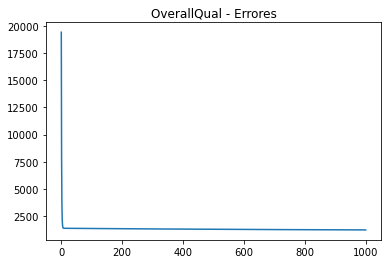

Error: 1391.3872090431587
Error: 1387.8486854348448
Error: 1384.4505410124752
Error: 1381.100324902047
Error: 1377.7973606915277
Error: 1374.5409819337456
Error: 1371.3305315811922
Error: 1368.165361853445
Error: 1365.0448341064634
Error: 1361.9683187037303


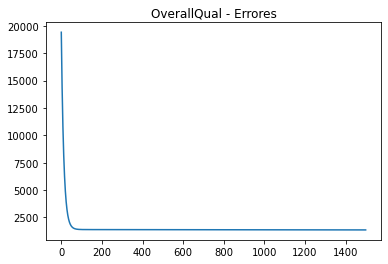

Error: 5038.410635515049
Error: 2125.07674736828
Error: 1540.100749056788
Error: 1422.344263720589
Error: 1398.342860278944
Error: 1393.155478464707
Error: 1391.74410543436
Error: 1391.091144305315
Error: 1390.5910691364213
Error: 1390.1223710346512


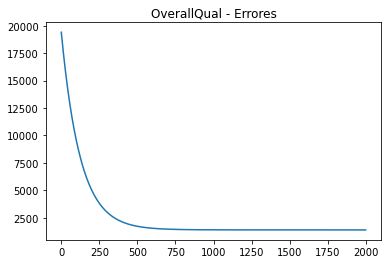

In [75]:
model_quality, errors_quality = train_model(x,y,1000,100,0.01)
plot_error(errors_quality,colname[1])

model_quality, errors_quality = train_model(x,y,1500,150,0.001)
plot_error(errors_quality,colname[1])

model_quality, errors_quality = train_model(x,y,2000,200,0.0001)
plot_error(errors_quality,colname[1])

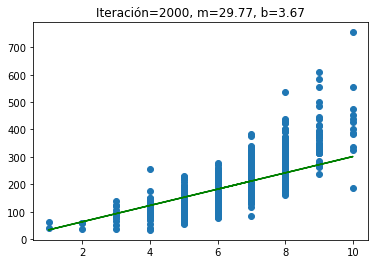

In [82]:
plot_model(x,y,model_quality,2000)

In [83]:
x = train_dataset[:,2].reshape(-1,1)
y = train_dataset[:,0].reshape(-1,1)

model_1flrsf, errors_1flrsf = train_model(x,y,10000,1000,0.83)
plot_error(errors_1flrsf,variables[2])

model_1flrsf, errors_1flrsf = train_model(x,y,10000,1000,0.0001)
plot_error(errors_1flrsf,variables[2])

model_1flrsf, errors_1flrsf = train_model(x,y,10000,1000,0.82)
plot_error(errors_1flrsf,variables[2])

NameError: name 'train_dataset' is not defined